In [7]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [3]:
'''
Lasso
・L1正規化を行い、リッジ回帰同様係数が０になるように制約する。
・特徴量の中のいくつかの係数が０になるのが特徴。
　→その特徴量を完全に無視することを意味する。自動的に特徴量が選択されていると言える。
 →どの特徴量が重要なのかがわかるため、モデルを理解しやすい。
'''

# 訓練セットとテストセットどちらに対しても性能が悪い→適合不足

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

# 傾きがゼロでない→特徴量として使用したということ
print("Number of feature used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of feature used: 4


In [4]:
# リッジ同様alphaパラメータがある
# 適合不足を修正するために、alphaを小さくする（その場合、仕様上max_iterパラメータを増やす必要がある）

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [5]:
# alphaを小さくしすぎると、リッジと同様に正規化の効果が薄れ、過剰適合となる。

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

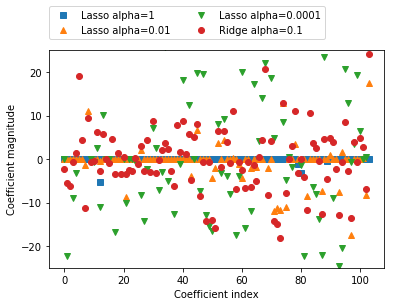

In [9]:
'''
まずはリッジ回帰を試すとよい。
特徴量が多いが、重要なそれは少ないといった場合はLassoがよい。
解釈しやすいモデルが欲しい時もLassoがよい。
'''

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

from sklearn.linear_model import Ridge
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


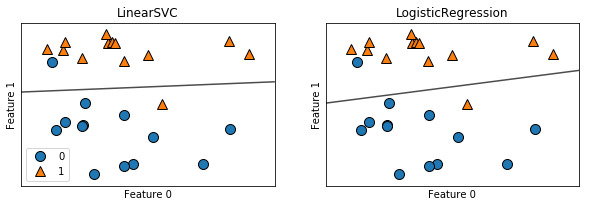

In [10]:
'''
線形モデルでクラス分類をする

ロジスティック回帰 LogisticRegression
線形サポートベクタマシン LinearSVC
'''

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

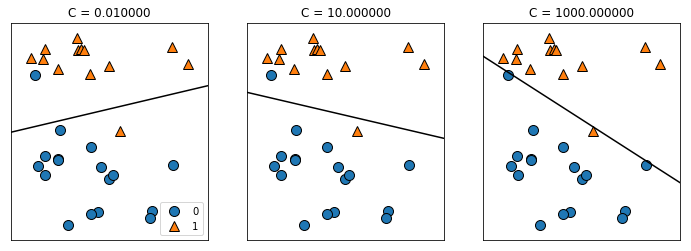

In [11]:
'''
LogisticRegressionとLinearSVCにおける正則化の強度を決定するトレードオフパラメータはCと呼ばれる。
Cを大きくする→正則化が弱まる（訓練データに対してより適合しようとする）。ここのデータポイントを正確に分類するようになる
Cを小さくする→係数をゼロに近づけようとする。「データポイントの大多数」に対して適合しようとする
'''

mglearn.plots.plot_linear_svc_regularization()